# Population and density project

In [1]:
#Importing all essential liabraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



import warnings
warnings.filterwarnings('ignore')

## Data exploration:

In [2]:
#Upload the data we have recieved from crawling.

df = pd.read_csv('final_data.csv')
df.head()

,City,Country,Population,Area,country population,country area,country density,growth rate,2009 growth rate,2005-2010 growth rate,2010-2015 growth rate,2015-2020 growth rate
0,Ghazni,Afghanistan,190400,NaN,40099462.0,652864.0,61.0,2.26,2.44,2.78,3.16,2.41
1,Herat,Afghanistan,592900,182.00,40099462.0,652864.0,61.0,2.26,2.44,2.78,3.16,2.41
2,Jalalabad,Afghanistan,280600,122.00,40099462.0,652864.0,61.0,2.26,2.44,2.78,3.16,2.41
3,Kabul,Afghanistan,4601700,1028.24,40099462.0,652864.0,61.0,2.26,2.44,2.78,3.16,2.41
4,Kandahar,Afghanistan,651400,273.37,40099462.0,652864.0,61.0,2.26,2.44,2.78,3.16,2.41


In [3]:
#Total size of the data before cleaning.

df.shape

(4562, 12)

In [4]:
df.isnull().sum()

City                        0
Country                     0
Population                  0
Area                     1555
country population        151
country area              151
country density           151
growth rate               161
2009 growth rate          178
2005-2010 growth rate     160
2010-2015 growth rate     160
2015-2020 growth rate     161
dtype: int64

In [5]:
# Although we had this specific year growth rate, we couldnt find more specific by years growth rate.
# So for this project we will only use the 5 years growth rate that we have.

df.drop('2009 growth rate', axis=1, inplace=True)

#Removing the rows that missing the most important data for the project.
#which is the Area of the city and the growth rate.
#as you can see this have made the data "clean", there is no more null in this dataframe.

df.dropna(subset=['Area'], inplace=True)
df.dropna(subset=['growth rate'], inplace=True)

#If there is missing data of a 5 year growht rate we fill it with the current growth rate.

df['2005-2010 growth rate'] = df['2005-2010 growth rate'].fillna(df['growth rate'])
df['2010-2015 growth rate'] = df['2010-2015 growth rate'].fillna(df['growth rate'])
df['2015-2020 growth rate'] = df['2015-2020 growth rate'].fillna(df['growth rate'])

#checking the data state after removing.

df.isnull().sum()

City                     0
Country                  0
Population               0
Area                     0
country population       0
country area             0
country density          0
growth rate              0
2005-2010 growth rate    0
2010-2015 growth rate    0
2015-2020 growth rate    0
dtype: int64

In [6]:
df.head(10)

,City,Country,Population,Area,country population,country area,country density,growth rate,2005-2010 growth rate,2010-2015 growth rate,2015-2020 growth rate
1,Herat,Afghanistan,592900,182.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
2,Jalalabad,Afghanistan,280600,122.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
3,Kabul,Afghanistan,4601700,1028.24,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
4,Kandahar,Afghanistan,651400,273.37,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
6,Kunduz,Afghanistan,268800,112.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
7,Lashkargah,Afghanistan,201500,384.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
8,Mazar-i-Sharif,Afghanistan,500200,83.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41
14,Durrës,Albania,175100,338.30,2854710.0,28748.0,99.0,0.19,-0.92,-0.12,0.13
15,Elbasan,Albania,141700,872.03,2854710.0,28748.0,99.0,0.19,-0.92,-0.12,0.13
16,Fier,Albania,120100,619.90,2854710.0,28748.0,99.0,0.19,-0.92,-0.12,0.13


In [7]:
#Getting all the unique values in each feature
features = df.columns
for feature in features:
    print(f"{feature} ---> {df[feature].nunique()}")

City ---> 2868
Country ---> 154
Population ---> 2371
Area ---> 2555
country population ---> 154
country area ---> 154
country density ---> 116
growth rate ---> 130
2005-2010 growth rate ---> 133
2010-2015 growth rate ---> 135
2015-2020 growth rate ---> 129


#### Feature Description:
1. City - The city name
2. Country - The country name
3. Population - The city's population
4. Area - The city's size by sq km
5. Country population - The country's population
6. Country area - The country's size by sq km
7. Country density - The country's density by persons/sq km
8. Growth rate - The country's growth rate (2023)
9. 2005-2010 growth rate - The country's growth rate in the years 2005-2010
10. 2010-2015 growth rate - The country's growth rate in the years 2010-2015
11. 2015-2020 growth rate - The country's growth rate in the years 2015-2020

In [8]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='country population',  
                    hover_name='Country',                    
                    title = 'World population by country',
                    color_continuous_scale='Viridis'
                    )
fig.show()

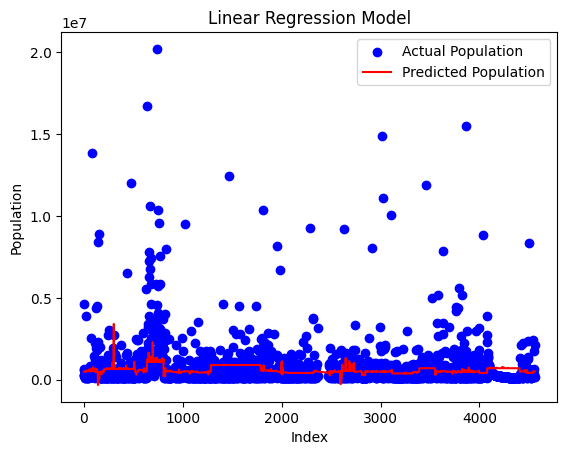

In [9]:
X = df[['Area', 'country population', 'country area', 'country density']]
y = df['Population']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(df.index, y, color='blue', label='Actual Population')
plt.plot(df.index, y_pred, color='red', label='Predicted Population')
plt.xlabel('Index')
plt.ylabel('Population')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [10]:
X = df[['Population', 'Area', 'country population', 'country area',
        'country density', 'growth rate', '2005-2010 growth rate',
        '2010-2015 growth rate', '2015-2020 growth rate']]
y = df['country density']

model = LinearRegression()

model.fit(X, y)

test_df = df[['Population', 'Area', 'country population', 'country area',
        'country density', 'growth rate', '2005-2010 growth rate',
        '2010-2015 growth rate', '2015-2020 growth rate']]

predictions = model.predict(test_df)

test_df['Predicted Density'] = predictions
r2 = r2_score(y, predictions)

test_df

print(f"R2 Score: {r2}")

R2 Score: 1.0


In [11]:
test_df

,Population,Area,country population,country area,country density,growth rate,2005-2010 growth rate,2010-2015 growth rate,2015-2020 growth rate,Predicted Density
1,592900,182.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.0
2,280600,122.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.0
3,4601700,1028.24,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.0
4,651400,273.37,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.0
6,268800,112.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.0
...,...,...,...,...,...,...,...,...,...,...
4552,1747152,360.00,19473125.0,752612.0,26.0,2.86,2.78,3.01,2.97,26.0
4555,653300,545.80,15993524.0,390757.0,41.0,1.95,1.70,2.27,2.28,41.0
4556,356800,49.02,15993524.0,390757.0,41.0,1.95,1.70,2.27,2.28,41.0
4558,2123100,940.00,15993524.0,390757.0,41.0,1.95,1.70,2.27,2.28,41.0


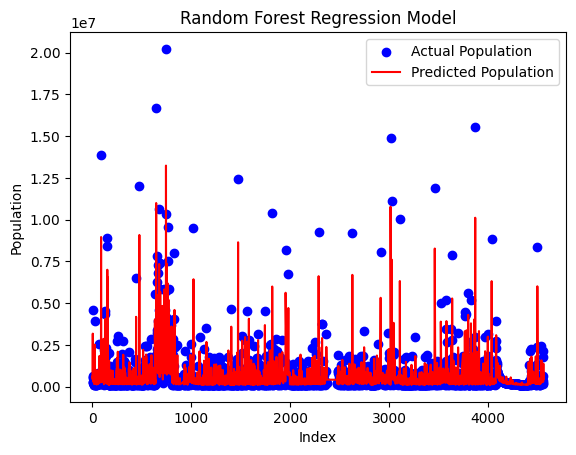

In [12]:
X = df[['Area', 'country population', 'country area', 'country density']]
y = df['Population']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(df.index, y, color='blue', label='Actual Population')
plt.plot(df.index, y_pred, color='red', label='Predicted Population')
plt.xlabel('Index')
plt.ylabel('Population')
plt.title('Random Forest Regression Model')
plt.legend()
plt.show()

In [13]:
X = df[['Population', 'Area', 'country population', 'country area',
        'country density', 'growth rate', '2005-2010 growth rate',
        '2010-2015 growth rate', '2015-2020 growth rate']]
y = df['country density']

model = RandomForestRegressor()

model.fit(X, y)

test_df = df[['Population', 'Area', 'country population', 'country area',
        'country density', 'growth rate', '2005-2010 growth rate',
        '2010-2015 growth rate', '2015-2020 growth rate']]

predictions = model.predict(test_df)

test_df['Predicted Density'] = predictions
r2 = r2_score(y, predictions)

print(f"R2 Score: {r2}")

R2 Score: 0.9999704422911637


In [14]:
test_df

,Population,Area,country population,country area,country density,growth rate,2005-2010 growth rate,2010-2015 growth rate,2015-2020 growth rate,Predicted Density
1,592900,182.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.00
2,280600,122.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.00
3,4601700,1028.24,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.00
4,651400,273.37,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.00
6,268800,112.00,40099462.0,652864.0,61.0,2.26,2.78,3.16,2.41,61.00
...,...,...,...,...,...,...,...,...,...,...
4552,1747152,360.00,19473125.0,752612.0,26.0,2.86,2.78,3.01,2.97,25.99
4555,653300,545.80,15993524.0,390757.0,41.0,1.95,1.70,2.27,2.28,40.77
4556,356800,49.02,15993524.0,390757.0,41.0,1.95,1.70,2.27,2.28,40.83
4558,2123100,940.00,15993524.0,390757.0,41.0,1.95,1.70,2.27,2.28,40.77


In [15]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='country density',
                    hover_name='Country',                    
                    title = 'World density',
                    color_continuous_scale='amp'
                    )
fig.show()

In [16]:
df1 = df[['Country', 'country population', 'country area', 'country density', 'growth rate']]

df1 = df1.drop_duplicates(subset='Country')

predictions_df = pd.DataFrame(df1['Country'])

X = df[['country population', 'country area', 'country density']]
y = df['growth rate']

model = LinearRegression()
model.fit(X, y)

predictions_df['Predicted Population 2050'] = df['country population'] * (1 + model.predict(X))
predictions_df['Predicted Density 2050'] = predictions_df['Predicted Population 2050'] / df['country area']

predictions_df

,Country,Predicted Population 2050,Predicted Density 2050
1,Afghanistan,7.323703e+07,112.178086
14,Albania,5.237780e+06,182.196335
24,Algeria,7.829206e+07,32.871779
61,Angola,6.263902e+07,50.243857
85,Argentina,7.954472e+07,28.609092
...,...,...,...
4429,Venezuela,5.154615e+07,56.516800
4475,Vietnam,1.698101e+08,513.087989
4538,Yemen,6.038603e+07,114.374408
4546,Zambia,3.575931e+07,47.513613


In [17]:
fig = px.choropleth(predictions_df,
                    locations='Country',
                    locationmode='country names',
                    color='Predicted Density 2050',
                    hover_name='Country',                    
                    title = 'Predicted World density in 2050',
                    color_continuous_scale='amp'
                    )
fig.show()